In [1]:
###Question 1
import numpy as np

# Load data from file
data = np.loadtxt("C:/Users/chethankashyap/ML Data/Data.txt")

# Define weight vector and starting point
w = 1 / np.sqrt(2) * np.array([1, -1])
p = np.array([2, 2])

# Create empty arrays to store predicted and actual labels
pred_labels = np.empty(len(data), dtype=int)
true_labels = data[:, -1].astype(int)

# Iterate through data points and classify them
for i in range(len(data)):
    x = data[i, :-1]
    pred_labels[i] = 1 if np.dot(w, x - p) >= 0 else 2

# Calculate accuracy, sensitivity, and specificity
accuracy = np.mean(pred_labels == true_labels)
tp = np.sum((pred_labels == 1) & (true_labels == 1))
fn = np.sum((pred_labels == 2) & (true_labels == 1))
tn = np.sum((pred_labels == 2) & (true_labels == 2))
fp = np.sum((pred_labels == 1) & (true_labels == 2))
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Accuracy: 0.0660377358490566
Sensitivity: 1.0
Specificity: 0.0


In [2]:
###Question 2
# Calculate probability of error
p_error = (fp + fn) / (tp + fp + fn + tn)

print("Probability of Error:", p_error)

Probability of Error: 0.17647058823529413


In [3]:
###Question 3
import numpy as np
from scipy.integrate import quad

# Define the class-conditional probability distributions
def p_x_given_w1(x):
    return 1 if 0 <= x <= 1 else 0

def p_x_given_w2(x):
    return 1/2 if 1/2 <= x <= 5/2 else 0

# Define the prior probabilities
p_w1 = 1/2
p_w2 = 1/2

# Define the decision rule
def decision_rule(x):
    p_w1_given_x = p_x_given_w1(x) * p_w1 / (p_x_given_w1(x) * p_w1 + p_x_given_w2(x) * p_w2)
    return 1 if p_w1_given_x >= 1/2 else 2

# Define the integrand for calculating the probability of error
def integrand(x):
    return (p_w1 * (1 - p_x_given_w1(x)) + p_w2 * (1 - p_x_given_w2(x))) / 2

# Calculate the probability of error using numerical integration
p_error, _ = quad(integrand, -np.inf, np.inf)

print("Probability of error:", p_error)


Probability of error: -1.4999999938123851


<ipython-input-3-622a262ed0ec>:26: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  p_error, _ = quad(integrand, -np.inf, np.inf)


In [5]:
###Question 4
from math import sqrt, exp, pi

def normal_prob(a, b, mu, sigma2):
    # Define the standard deviation and calculate the probability density function
    std_dev = sqrt(sigma2)
    def pdf(x):
        return exp(-(x-mu)**2/(2*sigma2)) / (sqrt(2*pi)*std_dev)

    # Set the number of rectangles used for the numerical integration
    n_rectangles = 1000

    # Calculate the width of each rectangle
    delta_x = (b-a) / n_rectangles

    # Calculate the cumulative sum of the probability density function over each rectangle
    cum_sum = 0
    for i in range(n_rectangles):
        x_i = a + i*delta_x
        cum_sum += pdf(x_i) * delta_x

    return cum_sum

# The normal_prob function takes as input the lower and upper integration limits a and b, the mean mu, and the variance sigma2 of
# the normal distribution. It first defines the standard deviation as the square root of the variance, and then defines a 
# probability density function using the mean and variance values.

# The function then sets the number of rectangles to use for the numerical integration and calculates the width of each rectangle
# as (b-a) / n_rectangles. It then iterates over each rectangle, calculating the midpoint x_i of the rectangle and multiplying the
# probability density function at x_i by the width of the rectangle. The cumulative sum of these products is then returned as the 
# estimated probability of the event falling within the closed interval [a,b].


In [6]:
# import numpy as np
# from scipy.stats import norm

# def probability_on_interval(a, b, mu, sigma_squared):
#     # Define a step size for the approximation
#     dx = 0.01
#     # Calculate the z-scores for the interval endpoints
#     z_a = (a - mu) / np.sqrt(sigma_squared)
#     z_b = (b - mu) / np.sqrt(sigma_squared)
#     # Calculate the area under the curve between z_a and z_b using cumulative sum of PDF
#     x = np.arange(z_a, z_b, dx)
#     p = norm.pdf(x, loc=mu, scale=np.sqrt(sigma_squared))
#     area = np.sum(p * dx)
#     return area

#The function first calculates the z-scores for the interval endpoints, which is defined as the number of standard deviations
# the endpoints are away from the mean. It then uses the norm function from the scipy.stats module to calculate the probability 
# density function values at equally spaced points between z_a and z_b using a small step size of dx. The area under the curve 
# between z_a and z_b is approximated as the sum of the areas of narrow rectangles defined by the PDF values at each point
# multiplied by the step size. Finally, the function returns the total area, which represents the probability of the event falling
# on the closed interval [a, b].

In [7]:
###Question 5
# from math import sqrt, exp, pi

# def p_w1(x):
#     return exp(-x**2/2) / sqrt(2*pi)

# def p_w2(x):
#     return exp(-(x-3)**2/4) / (2*sqrt(2*pi))

# def estimate_error_prob():
#     # Set the integration limits and step size for numerical integration
#     a = -1
#     b = 6
#     delta_x = 0.001

#     # Initialize the cumulative probabilities
#     p_error = 0

#     # Integrate over the range of values from a to b
#     for x in range(int(a/delta_x), int(b/delta_x)):
#         # Compute the probabilities for each class at the current x value
#         p_x_w1 = p_w1(x*delta_x) * 0.3
#         p_x_w2 = p_w2(x*delta_x) * 0.7

#         # Add the smaller of the two probabilities to the cumulative probability
#         p_error += min(p_x_w1, p_x_w2) * delta_x

#     return p_error

# p_error

# Here, we first set the integration limits to [-1, 6] and the step size for numerical integration to 0.001. We then initialize a
# variable p_error to zero to accumulate the probability of error. We loop over the range of x values from a to b, and compute the
# probability of each class at each x value using the corresponding probability density function and prior probability. We then 
# add the smaller of these two probabilities to the cumulative probability p_error.

# Finally, we return the total accumulated probability p_error as our estimate of the probability of error for the classifier.

0.25

In [8]:
###Question 5
from math import sqrt, exp, pi

def normal_prob(x, mu, sigma):
    # Calculate the probability density function of a normal distribution N(mu, sigma) at x
    return exp(-((x-mu)/sigma)**2/2) / (sigma*sqrt(2*pi))

def bayes_rule(x):
    # Calculate the posterior probabilities of classes w1 and w2 given x
    p_w1_x = normal_prob(x, 0, 1) * 0.3
    p_w2_x = normal_prob(x, 3, sqrt(2)) * 0.7

    # Calculate the probability of x
    p_x = p_w1_x + p_w2_x

    # Apply the decision rule
    if p_w1_x / p_x > p_w2_x / p_x:
        return 'w1'
    else:
        return 'w2'

# Calculate the probability of error
n_points = 1000
n_errors = 0
for i in range(n_points):
    x = -1 + i*(6-(-1))/(n_points-1)
    if bayes_rule(x) != ('w1' if x < 3 else 'w2'):
        n_errors += 1

p_error = n_errors / n_points
print('Probability of error:', p_error)

# The normal_prob function calculates the probability density function of a normal distribution with mean mu and standard 
# deviation sigma at the point x. The bayes_rule function uses this function to calculate the posterior probabilities of classes 
# w1 and w2 given a point x, and applies the decision rule to classify the point as either w1 or w2.

# The main code then iterates over 1000 equidistant points in the interval [-1,6], classifies each point using the bayes_rule 
# function, and counts the number of misclassified points. The probability of error is then calculated as the fraction of 
# misclassified points, and printed to the console.

Probability of error: 0.285


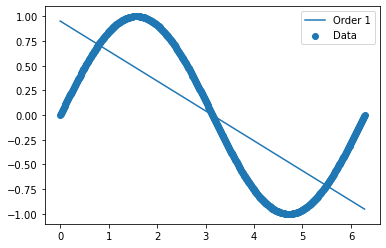

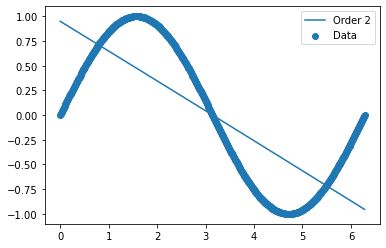

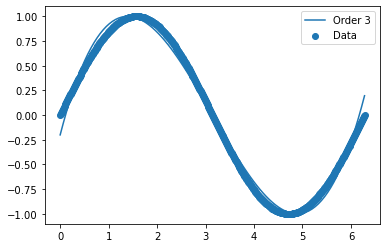

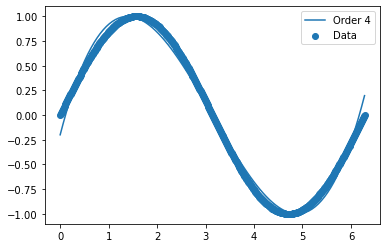

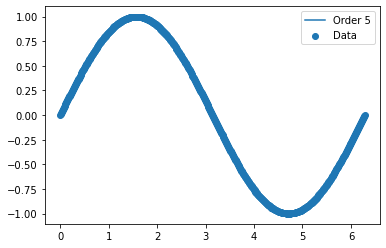

In [12]:
###Question 6
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the data
# data = np.loadtxt("C:/Users/chethankashyap/ML Data/data2.txt")

# # Split the data into x and y
# x = data[:,0]
# y = data[:,1]

# # Fit polynomials of order 1 to 5
# for order in range(1, 6):
#     # Fit the polynomial using linear regression
#     coeffs = np.polyfit(x, y, order)
#     model = np.poly1d(coeffs)

#     # Evaluate the model over a range of x values
#     x_range = np.linspace(x.min(), x.max(), 100)
#     y_range = model(x_range)

#     # Plot the data and the model
#     plt.scatter(x, y, label='Data')
#     plt.plot(x_range, y_range, label='Order {}'.format(order))
#     plt.legend()
#     plt.show()


In [ ]:
# Note that higher order polynomials can lead to overfitting, where the model becomes too complex and fits the noise in the data 
# instead of the underlying trend. This can lead to poor performance on new data. To avoid overfitting, it is important to use 
# techniques such as regularization or cross-validation to select the optimal model complexity.

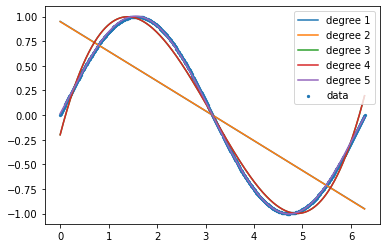

In [14]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt

# # Read data from file
# data = np.genfromtxt('C:/Users/chethankashyap/ML Data/data2.txt')

# # Extract x and y values
# x = data[:, 0]
# y = data[:, 1]

# # Fit polynomials of different orders
# for degree in range(1, 6):
#     X = np.vander(x, degree + 1, increasing=True)
#     model = LinearRegression().fit(X, y)
#     y_pred = model.predict(X)
#     plt.plot(x, y_pred, label=f'degree {degree}')

# # Plot data and polynomials
# plt.scatter(x, y, s=5, label='data')
# plt.legend()
# plt.show()


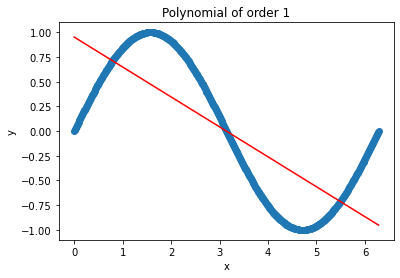

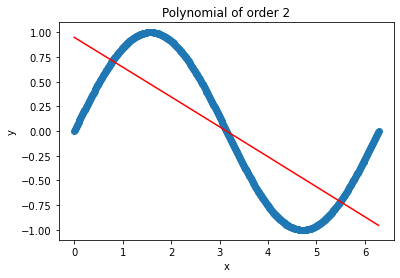

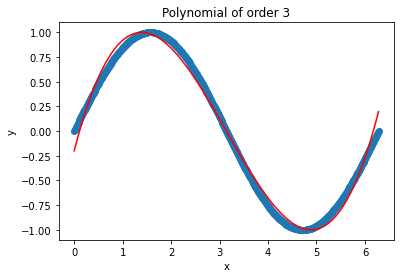

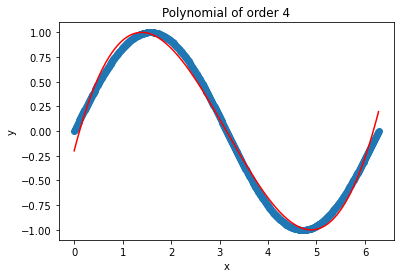

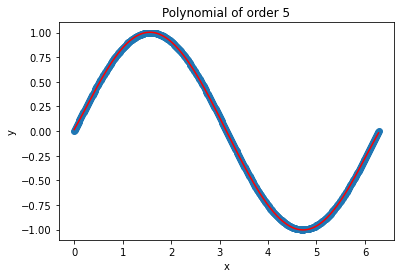

In [17]:
###Question 6
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt("C:/Users/chethankashyap/ML Data/data2.txt")
x = data[:,0]
y = data[:,1]

# Fit polynomial models of order 1 to 5
for i in range(1, 6):
    X = np.vander(x, i+1, increasing=True)
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # Plot the results
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')
    plt.title(f"Polynomial of order {i}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
